In [37]:
# K-means clustering for semisupervised learning
# Code is from chapter 9 of
# https://github.com/ageron/handson-ml2


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl

import itertools
from scipy import linalg


# color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'darkorange'])
color_iter = itertools.cycle(["r", "g", "b"])
prop_cycle = plt.rcParams["axes.prop_cycle"]
color_iter = prop_cycle.by_key()["color"]

try:
    from sklearn.cluster import KMeans
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

from matplotlib.colors import LogNorm


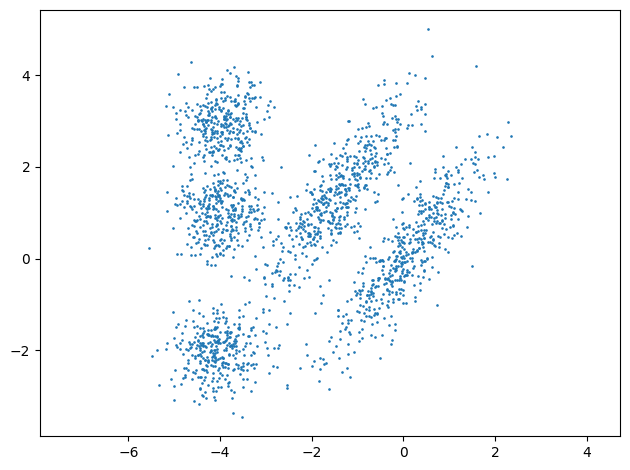

In [38]:
if 0:
    K = 5
    blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
    blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
    X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

if 0:
    X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
    X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
    X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
    X2 = X2 + [6, -8]
    X = np.r_[X1, X2]
    y = np.r_[y1, y2]
    K = 3

if 1:
    # two off-diagonal blobs
    X1, _ = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
    X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
    # three spherical blobs
    blob_centers = np.array([[-4, 1], [-4, 3], [-4, -2]])
    s = 0.5
    blob_std = np.array([s, s, s])
    X2, _ = make_blobs(n_samples=1000, centers=blob_centers, cluster_std=blob_std, random_state=7)

    X = np.r_[X1, X2]
    K = 5
plt.figure()
plt.scatter(X[:, 0], X[:, 1], 0.8)
plt.tight_layout()
plt.axis("equal")
# plt.savefig("figures/gmm_2d_data.pdf", dpi=300)
plt.show()

(5, 2, 2)
integral of pdf 1.0000000000000429
full


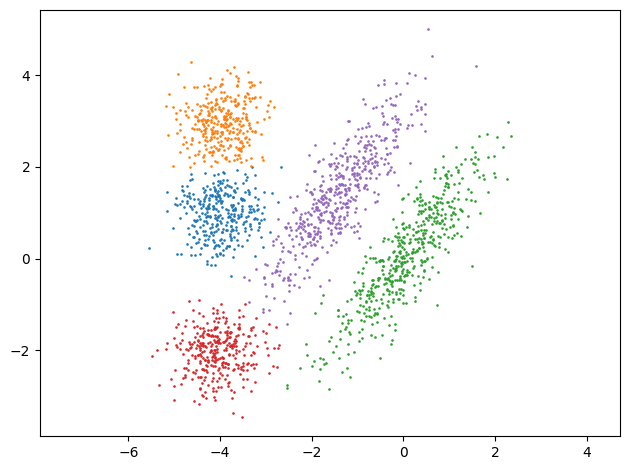

In [52]:
gm = GaussianMixture(n_components=K, n_init=10, random_state=42)
gm.fit(X)

w = gm.weights_
mu = gm.means_
Sigma = gm.covariances_
print(Sigma.shape)
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

# score_samples is the log pdf
pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
print("integral of pdf {}".format(pdf_probas.sum()))


# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html
def plot_gaussian_ellipse(gm, X):
    Y = gm.predict(X)
    means = gm.means_
    covariances = gm.covariances_
    K, D = means.shape
    print(gm.covariance_type)
    if gm.covariance_type == "tied":
        covariances = np.tile(covariances, (K, 1, 1))
    splot = plt.subplot(1, 1, 1)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        # if gm.covariance_type == "spherical":
        #     covar = covar * np.eye(D)
        # if gm.covariance_type == "diag":
        #     covar = np.diag(covar)
        # v, w = linalg.eigh(covar)
        # v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        # u = w[0] / linalg.norm(w[0])
        # print(X[i])
        plt.scatter(X[Y == i, 0], X[Y == i, 1], 0.8, color=color)
        # angle = np.arctan(u[1] / u[0])
        # angle = 180.0 * angle / np.pi  # convert to degrees
        # print(mean, v[0], v[1] , 180.0 + angle)
        # ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
        # ell.set_clip_box(splot.bbox)
        # ell.set_alpha(0.3)
        # splot.add_artist(ell)


plt.figure()
# plot_assignment(gm_full, X)
plot_gaussian_ellipse(gm, X)
plt.tight_layout()
plt.axis("equal")
# plt.savefig("figures/gmm_2d_clustering.pdf", dpi=300)
plt.show()

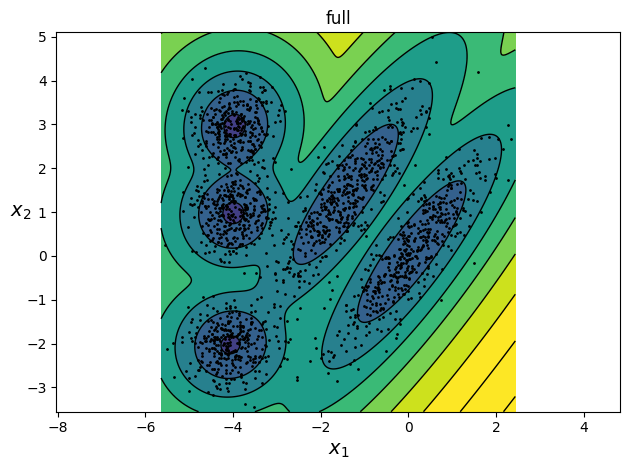

[-3.58308316 -3.39408574 -2.93972237 -4.04311578 -4.45755921 -4.55653017
 -4.27959855 -3.4316147  -3.76281576 -4.65035894 -4.68301259 -3.82604141
 -4.32222566 -3.77674974 -4.76014427 -4.43738514 -4.28019738 -4.37580726
 -3.57816678 -3.330686   -4.31862344 -4.0366466  -4.30391043 -4.1609328
 -3.9104192  -4.52877616 -4.19009786 -4.50667351 -4.26520063 -4.38876568
 -4.73509269 -4.70807745 -3.8148685  -4.16406729 -3.73610418 -3.28164019
 -3.06691296 -4.07393507 -4.28586726 -3.51096174 -4.82092848 -4.99949875
 -4.1069606  -4.83493432 -3.88700865 -4.22417566 -3.49333924 -3.48934232
 -4.15097394 -4.10973771 -4.86499274 -4.36549993 -3.80511651 -4.2603072
 -4.06469415 -3.41698269 -4.11452186 -3.72714372 -4.06320795 -4.5579001
 -4.05875524 -4.27025718 -3.20780753 -4.09645462 -4.11184092 -3.94466792
 -3.83586666 -3.87110502 -4.43193263 -4.26803394 -3.86507889 -3.32926431
 -3.69392844 -4.12345783 -2.76613957 -4.17365581 -4.40772671 -4.38074614
 -3.9615831  -4.80296354 -4.53911485 -4.14308713 -4.78

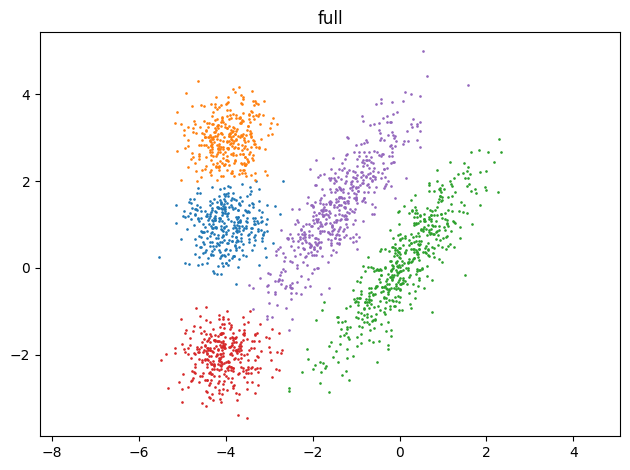

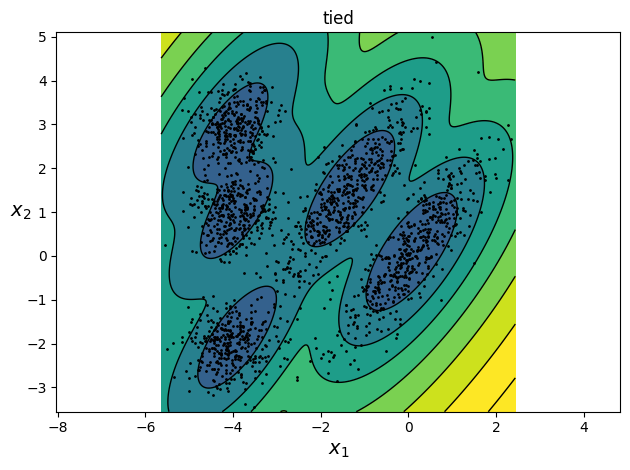

[-3.91933727 -3.42976321 -3.62416628 -4.40701222 -3.19568399 -4.07104011
 -5.11669041 -3.22116843 -4.33001488 -3.48344291 -4.67068281 -4.27266951
 -3.72797112 -3.8392269  -3.60862801 -4.34301743 -3.79179623 -4.34996615
 -4.09084513 -4.7193939  -4.29194306 -3.61501844 -3.78663281 -3.99647616
 -4.04423333 -4.8718841  -4.29639481 -3.50111853 -3.29785968 -4.16485137
 -4.60210992 -3.42327319 -3.43234129 -3.68503105 -3.55755602 -3.91903736
 -4.25798013 -4.69688829 -3.61975861 -3.78900188 -4.19547954 -4.22174756
 -4.12688863 -4.79412423 -4.05643845 -4.11298453 -3.30831526 -4.09708066
 -4.29470684 -3.50225096 -3.95073373 -4.93378837 -4.32405265 -4.57799802
 -3.92971727 -4.45412793 -3.98336506 -4.48274527 -4.1249538  -4.11201915
 -3.58103908 -3.26360052 -4.74624515 -4.29313516 -4.16013909 -3.82159876
 -5.15259164 -3.75147415 -3.94464676 -4.20546021 -4.3846317  -4.93022943
 -4.14734595 -4.10547193 -3.92604015 -4.18418035 -4.84169842 -4.56602573
 -4.47428381 -4.13058632 -4.20251162 -3.40157701 -3

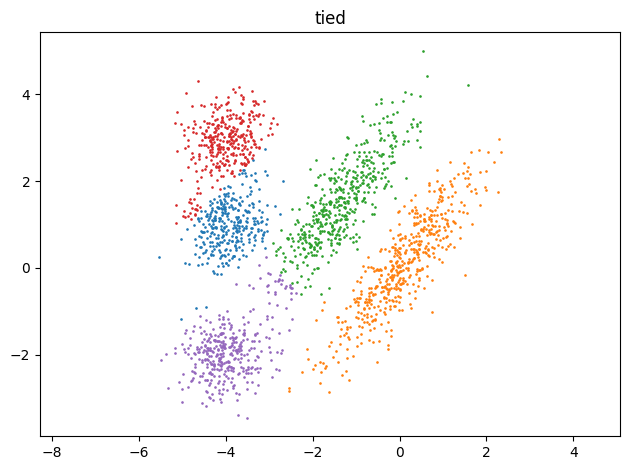

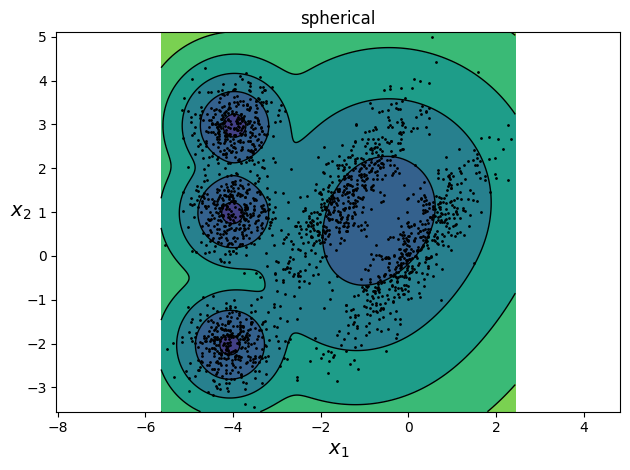

[-3.91933727 -3.42976321 -3.62416628 -4.40701222 -3.08907819 -3.19568399
 -4.07104011 -5.11669041 -3.22116843 -4.33001488 -3.48344291 -4.27266951
 -3.72797112 -3.8392269  -3.60862801 -4.34301743 -3.79179623 -4.34996615
 -4.09084513 -4.7193939  -4.29194306 -3.61501844 -3.78663281 -3.99647616
 -4.04423333 -4.8718841  -4.29639481 -3.50111853 -3.29785968 -4.16485137
 -3.42327319 -3.43234129 -3.68503105 -3.55755602 -3.09901114 -3.91903736
 -4.25798013 -4.69688829 -3.61975861 -3.78900188 -4.19547954 -4.22174756
 -4.12688863 -4.05643845 -4.11298453 -3.30831526 -4.09708066 -3.58867641
 -4.29470684 -3.50225096 -3.95073373 -4.57799802 -3.92971727 -4.45412793
 -3.98336506 -4.48274527 -4.1249538  -4.11201915 -3.58103908 -3.26360052
 -3.62781633 -4.74624515 -4.29313516 -4.16013909 -3.82159876 -3.75147415
 -3.94464676 -4.20546021 -4.3846317  -4.93022943 -4.14734595 -4.10547193
 -3.92604015 -4.18418035 -4.56602573 -4.47428381 -4.13058632 -4.20251162
 -3.40157701 -3.36469317 -3.48918849 -4.1894092  -4

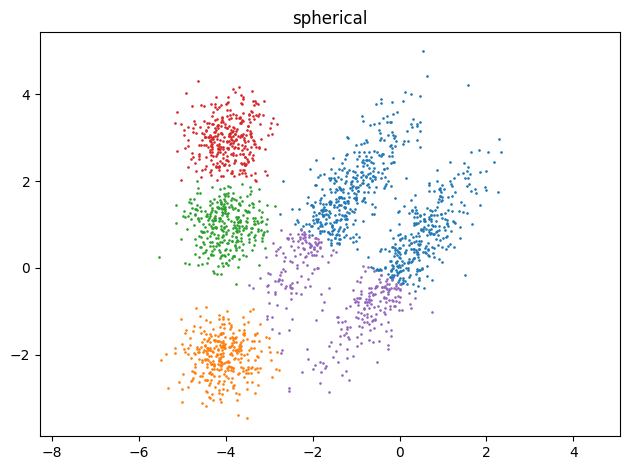

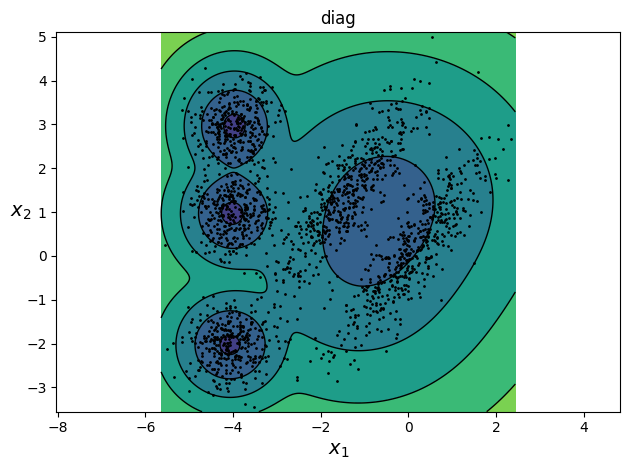

[-3.91933727 -3.42976321 -3.62416628 -4.40701222 -3.08907819 -3.19568399
 -4.07104011 -5.11669041 -3.22116843 -4.33001488 -3.48344291 -4.27266951
 -3.72797112 -3.8392269  -3.60862801 -4.34301743 -3.79179623 -4.34996615
 -4.09084513 -4.7193939  -4.29194306 -3.61501844 -3.78663281 -3.99647616
 -4.04423333 -4.8718841  -4.29639481 -3.50111853 -3.29785968 -4.16485137
 -3.42327319 -3.43234129 -3.68503105 -3.55755602 -3.09901114 -3.91903736
 -4.25798013 -4.69688829 -3.61975861 -3.78900188 -4.19547954 -4.22174756
 -4.12688863 -4.05643845 -4.11298453 -3.30831526 -4.09708066 -3.58867641
 -4.29470684 -3.50225096 -3.95073373 -4.57799802 -3.92971727 -4.45412793
 -3.98336506 -4.48274527 -4.1249538  -4.11201915 -3.58103908 -3.26360052
 -3.62781633 -4.74624515 -4.29313516 -4.16013909 -3.82159876 -3.75147415
 -3.94464676 -4.20546021 -4.3846317  -4.93022943 -4.14734595 -4.10547193
 -3.92604015 -4.18418035 -4.56602573 -4.47428381 -4.13058632 -4.20251162
 -3.40157701 -3.36469317 -3.48918849 -4.1894092  -4

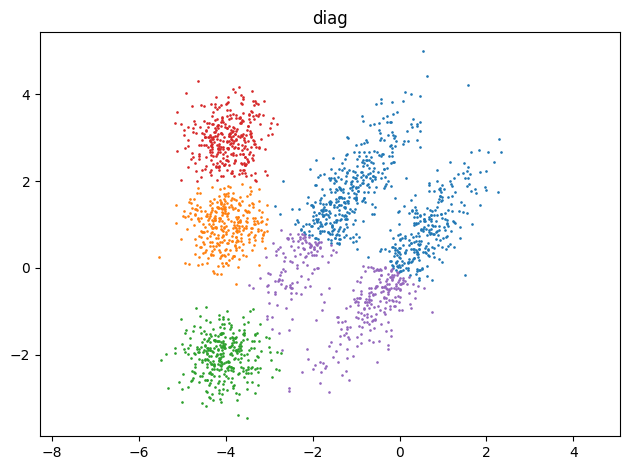

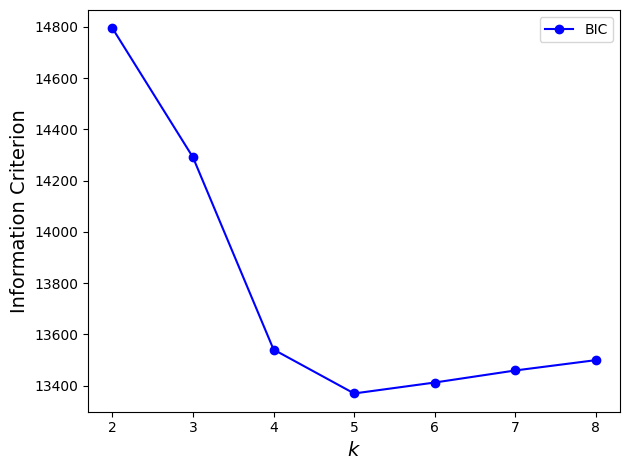

In [51]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], "k.", markersize=2)


def plot_centroids(centroids, weights=None, circle_color="w", cross_color="k"):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(
        centroids[:, 0], centroids[:, 1], marker="o", s=30, linewidths=8, color=circle_color, zorder=10, alpha=0.9
    )
    plt.scatter(
        centroids[:, 0], centroids[:, 1], marker="x", s=50, linewidths=50, color=cross_color, zorder=11, alpha=1
    )


def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))

    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors="k")

    # plot decision boundaries
    if 0:
        Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, linewidths=2, colors="r", linestyles="dashed")

    plt.plot(X[:, 0], X[:, 1], "k.", markersize=2)
    # plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


def plot_assignment(gm, X):
    # plt.figure(figsize=(8, 4))
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1])
    y_pred = gm.predict(X)
    K, D = gm.means_.shape
    for k in range(K):
        color = next(color_iter)
        plt.plot(X[y_pred == k, 0], X[y_pred == k, 1], "o", color=color)


gm_full = GaussianMixture(n_components=K, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=K, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=K, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=K, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)


def make_plot(gm, X, name):
    ttl = name
    # plt.figure(figsize=(8, 4))
    plt.figure()
    plot_gaussian_mixture(gm, X)
    fname = f"figures/gmm_2d_{name}_contours.pdf"
    plt.title(ttl)
    plt.tight_layout()
    plt.axis("equal")
    # plt.savefig(fname, dpi=300)
    plt.show()

    # plt.figure(figsize=(8, 4))
    plt.figure()
    # plot_assignment(gm, X)
    plot_gaussian_ellipse(gm, X)
    plt.title(ttl)
    fname = f"figures/gmm_2d_{name}_components.pdf"
    plt.tight_layout()
    plt.axis("equal")
    # plt.savefig(fname, dpi=300)
    plt.show()


if 1:
    make_plot(gm_full, X, "full")
    make_plot(gm_tied, X, "tied")
    make_plot(gm_spherical, X, "spherical")
    make_plot(gm_diag, X, "diag")


# Choosing K. Co,mpare to kmeans_silhouette
Ks = range(2, 9)
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) for k in Ks]

bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]


plt.figure()
plt.plot(Ks, bics, "bo-", label="BIC")
# plt.plot(Ks, aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
# plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
if 0:
    plt.annotate(
        "Minimum",
        xy=(3, bics[2]),
        xytext=(0.35, 0.6),
        textcoords="figure fraction",
        fontsize=14,
        arrowprops=dict(facecolor="black", shrink=0.1),
    )
plt.legend()
plt.tight_layout()
# plt.savefig("figures/gmm_2d_bic_vs_k.pdf", dpi=300)
plt.show()